# This is Heart Disease Prediction Project 
* We are goning to predict based on data whether someone have heart disease or not      
*_____________________________________________________________________________________________________________________________
 
   * : Problem defination
   * : Data
   * : Evaluate
   * : Features
   * : Modeling
   * : Experimentation

## 1 - Problem defination
 Based on given data we need to predict if a patient has heart disease or not 

## 2 - Data 
we have the data and have loaded it already 

## 3 - Evaluate 
In initial stages we need to make sure.if our model gives us the accuracy of 95%

## 4 - Features 
what features are important, what features columns means that 
* (https://archive.ics.uci.edu/dataset/45/heart+disease) 

Only 14 attributes used:

      1.(age)       
      2.(sex)       
      3.(cp)        
      4.(trestbps)  
      5.(chol)      
      6.(fbs)       
      7.(restecg)   
      8.(thalach)   
      9.(exang)     
      10.(oldpeak)   
      11.(slope)     
      12.(ca)        
      13.(thal)      
      14.(num)       (the predicted attribute)

## Tools Preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
# Importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing Evaluation library's
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Exploring  the Data initial Stage 

* 1 - What problem i am going to solve 
* 2 - What kind of data i have
* 3 - Does this data have missing values
* 4 - Are there any outliers,sporious vectors
* 5 - Can we add or remove some of the features 

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(302, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
298,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
299,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
300,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
301,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


In [5]:
df['target'].value_counts()

1    161
0    141
Name: target, dtype: int64

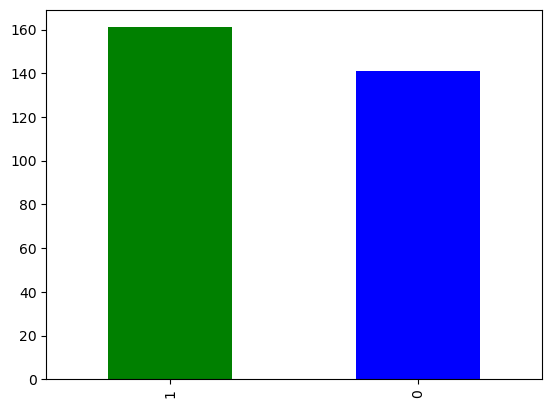

In [6]:
df['target'].value_counts().plot(kind='bar',color =['green','blue']);

In [7]:
df.isna().sum() # Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe() # statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,53.394040,0.735099,0.953642,131.678808,247.129139,0.165563,0.496689,150.983444,0.344371,1.065894,1.427152,0.698675,2.317881,0.533113
std,9.473886,0.442013,1.013777,18.492869,56.788878,0.372305,0.526686,23.384616,0.475951,1.231074,0.631134,1.007578,0.597568,0.499730
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,138.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,0.000000,0.000000,154.000000,0.000000,0.800000,2.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,283.000000,0.000000,1.000000,168.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts() # 1 male / 0 females

1    222
0     80
Name: sex, dtype: int64

In [10]:
len(df)

302

In [11]:
pd.crosstab(df.target,df.sex) # comparssion 

sex,0,1
target,,
0,21,120
1,59,102


In [12]:
59/80

0.7375

In [13]:
102/222

0.4594594594594595

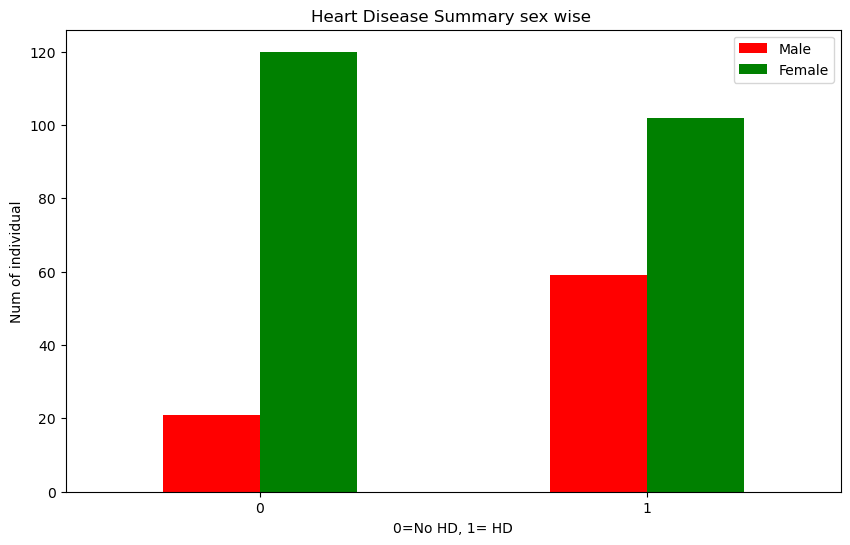

In [14]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title("Heart Disease Summary sex wise ")
plt.xlabel('0=No HD, 1= HD')
plt.ylabel('Num of individual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0);

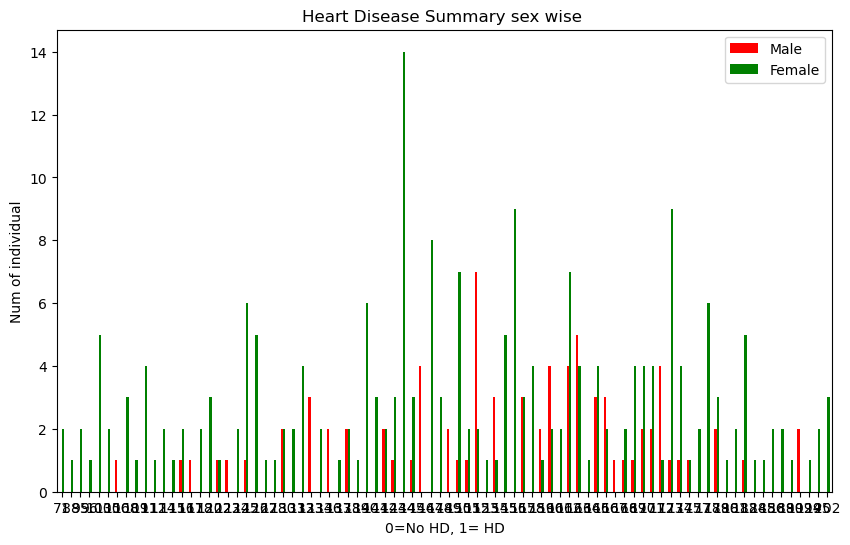

In [15]:
pd.crosstab(df.thalach,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title("Heart Disease Summary sex wise ")
plt.xlabel('0=No HD, 1= HD')
plt.ylabel('Num of individual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0);

In [16]:
df.thalach.value_counts() # be carefull what you plot 

144    14
162    11
173    10
156     9
163     9
       ..
115     1
112     1
123     1
139     1
137     1
Name: thalach, Length: 84, dtype: int64

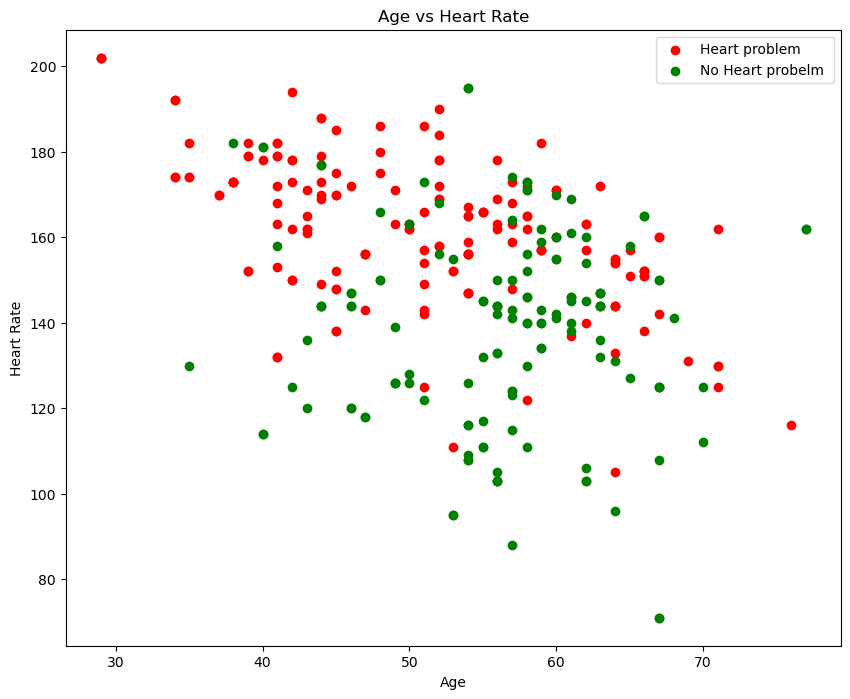

In [17]:
# Finding Patterns in Data using Scatter Plot
plt.figure(figsize=(10,8))
#create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red');
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green');
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(["Heart problem","No Heart probelm "]);

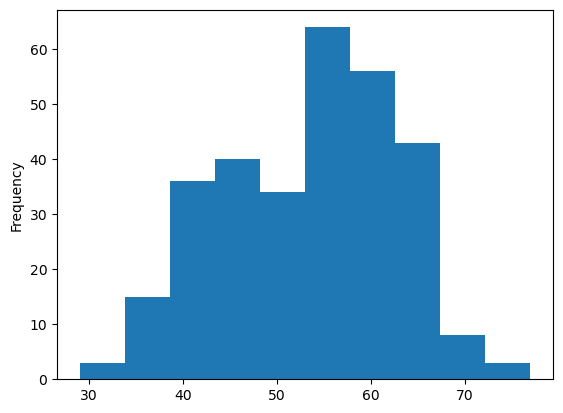

In [18]:
# Create Histogram to see age distribution 
df.age.plot.hist(); 
# histogram show many concepts, check no outlier in age column or graph show skewed mean ((Higher age values have heart disease) and 50/50 shows teh perfect Gassius distribution)


In [19]:
pd.crosstab(df.cp,df.target) # Relation of two columns

target,0,1
cp,,
0,111,30
1,8,47
2,19,66
3,3,18


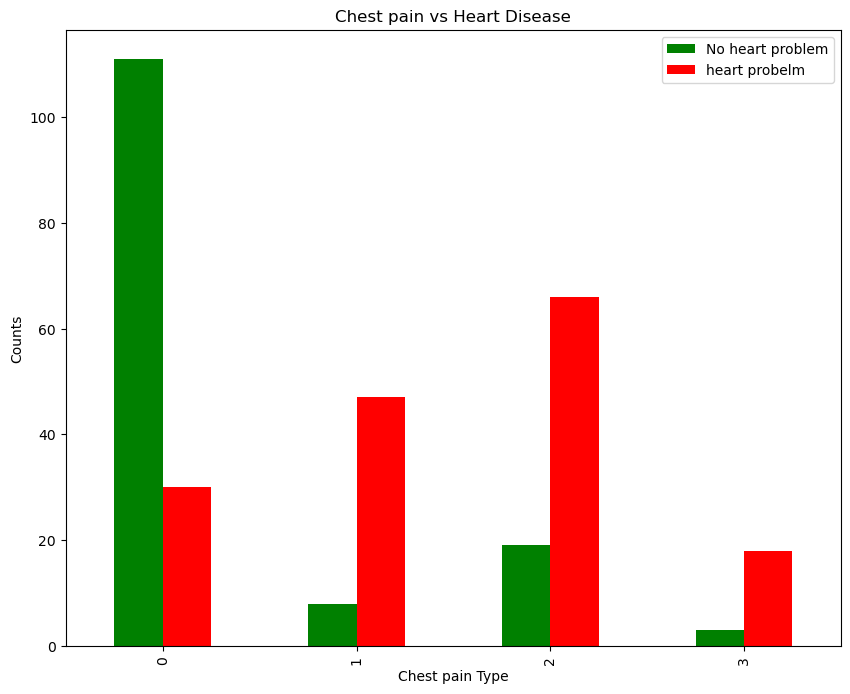

In [20]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,8),
                                  color=['green','red'])

# make some discription of the chart 

plt.title('Chest pain vs Heart Disease')
plt.xlabel('Chest pain Type')
plt.ylabel('Counts')
plt.legend(['No heart problem','heart probelm']);

## Correlation Matrix

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
df.corr() # show that digenol values or positive correlation or negative correlation 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.120176,-0.131267,0.235237,0.321077,0.182068,-0.188496,-0.395985,0.179054,0.212232,-0.238826,0.210165,0.147397,-0.271177
sex,-0.120176,1.000000,-0.034910,-0.105957,-0.247722,-0.015242,-0.103676,-0.103922,0.119224,0.110945,-0.057495,0.111105,0.181506,-0.245928
cp,-0.131267,-0.034910,1.000000,-0.012138,-0.107000,0.038007,0.043267,0.339946,-0.455667,-0.226476,0.212786,-0.153576,-0.151084,0.521103
trestbps,0.235237,-0.105957,-0.012138,1.000000,0.113814,0.218136,-0.080779,0.015821,0.094139,0.189504,-0.131384,0.103908,0.172816,-0.171942
chol,0.321077,-0.247722,-0.107000,0.113814,1.000000,0.026641,-0.126445,-0.068230,0.076524,0.044719,-0.053545,0.026752,0.165608,-0.036618
fbs,0.182068,-0.015242,0.038007,0.218136,0.026641,1.000000,-0.098851,-0.063029,0.108395,0.076873,-0.146445,0.133432,-0.028284,-0.083134
restecg,-0.188496,-0.103676,0.043267,-0.080779,-0.126445,-0.098851,1.000000,0.069455,-0.088208,-0.022976,0.079228,-0.055100,-0.144427,0.177133
thalach,-0.395985,-0.103922,0.339946,0.015821,-0.068230,-0.063029,0.069455,1.000000,-0.475291,-0.404682,0.513041,-0.183374,-0.143697,0.490596
exang,0.179054,0.119224,-0.455667,0.094139,0.076524,0.108395,-0.088208,-0.475291,1.000000,0.401706,-0.380723,0.133967,0.197882,-0.495079
oldpeak,0.212232,0.110945,-0.226476,0.189504,0.044719,0.076873,-0.022976,-0.404682,0.401706,1.000000,-0.562282,0.208367,0.170140,-0.502271


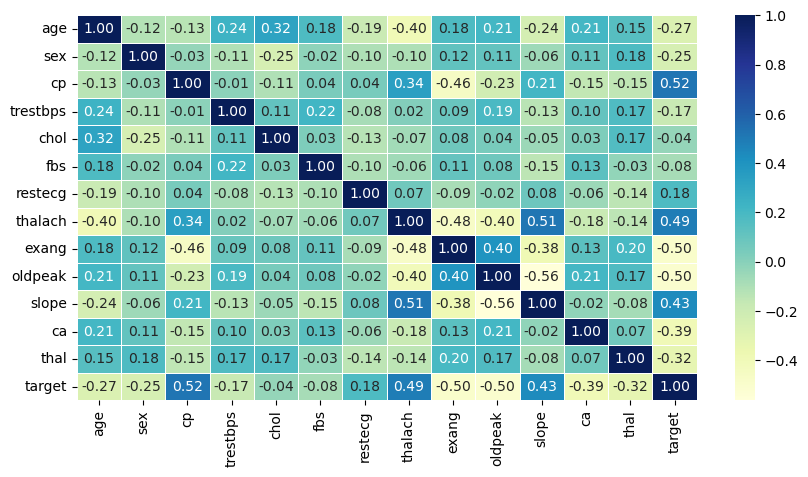

In [23]:
# Lets draw Coreelation Map
cor_map = df.corr()
fig,ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(cor_map,
                annot = True,
                linewidth = 0.5,
                fmt = '0.2f',
                cmap = 'YlGnBu');

# Modeling


In [24]:
# define x , y for modeling
x = df.drop('target',axis=1)
y = df['target']

In [25]:
# using randomseed, so that  others could produce  the same result
np.random.seed(7)
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)


In [26]:
len(x_train),len(y_train) # 80% data are in x_train or y_train totel we have 302 samples

(241, 241)

# The Model we are going to use 
1. K-Nearest Neighbours Classifier
2. Random Forest Classifier
3. Logistic Regression 

In [27]:
# putting the models into Dictionary
models = {'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Logistic Regression' : LogisticRegression()}

# Create Function to evaluate the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # make a dict to score the models
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model
        model_score[name] = model.score(x_test,y_test)
    return  model_score

In [28]:

model_scores = fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

{'KNN': 0.7540983606557377,
 'Random Forest': 0.9508196721311475,
 'Logistic Regression': 0.8524590163934426}

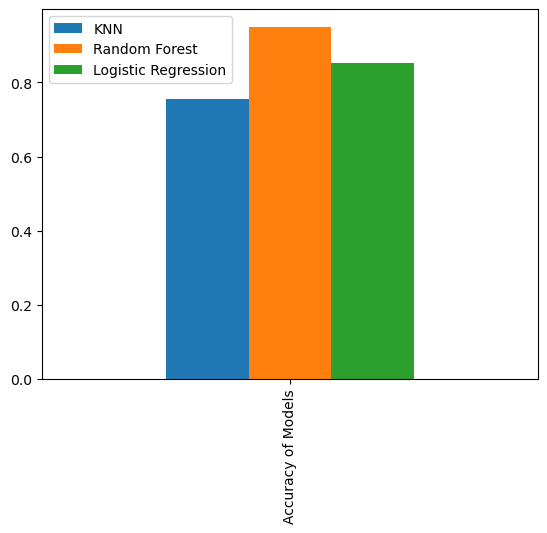

In [29]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy of Models'])
model_compare.plot.bar();

## Improving and Tuning the Model 
    universal Methods used for all Classification problems
    
    * Hyperparameter Tuning
    * Features Improving 
    
    Advanced Level
    
    * Confusion_Matrix
    * Cross_validation
    * Precision
    * Recall
    * f1
    * Classification Report 
    * ROC Curve
    

In [30]:
# Hyperparameter Tuning
# Features Improving 
# KNN.set_params()  # hyperparametrs of KNN (metric_parmas= None / n_jobs= None / n_neighbors= 5 / p = 2 / weights = 'uniform' / algorithm = 'auto' / leaf_size = 30 )

train_score = []
test_score = []
# create range to be test for n_neighbors
nneighbors = range(1,30)
KNN = KNeighborsClassifier() #create instance
# Looping through the range 
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value
    KNN.fit(x_train,y_train)
    # Update the training  score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score 
    test_score.append(KNN.score(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [31]:
train_score

[1.0,
 0.8921161825726142,
 0.8506224066390041,
 0.8174273858921162,
 0.7966804979253111,
 0.8298755186721992,
 0.7842323651452282,
 0.7966804979253111,
 0.7966804979253111,
 0.7842323651452282,
 0.7842323651452282,
 0.7800829875518672,
 0.7842323651452282,
 0.7676348547717843,
 0.7593360995850622,
 0.7717842323651453,
 0.7385892116182573,
 0.7634854771784232,
 0.7510373443983402,
 0.7302904564315352,
 0.7551867219917012,
 0.7551867219917012,
 0.7261410788381742,
 0.7468879668049793,
 0.7510373443983402,
 0.7427385892116183,
 0.7344398340248963,
 0.7385892116182573,
 0.7385892116182573]

In [32]:
np.max(test_score)

0.819672131147541

## Plot the Accuracy Score

 Max KNN score 81.97%


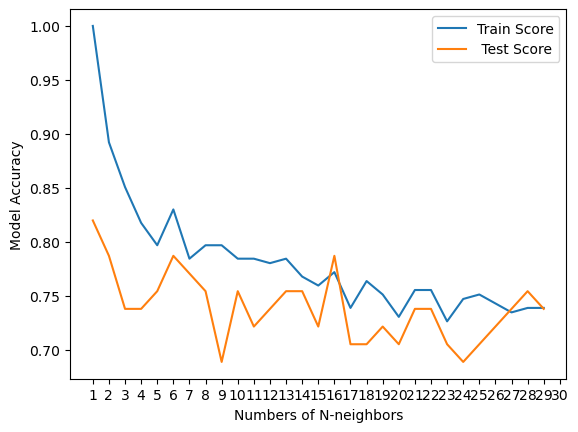

In [33]:
plt.plot(nneighbors,train_score, label=  'Train Score')
plt.plot(nneighbors,test_score, label= ' Test Score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Numbers of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f" Max KNN score {max(test_score)*100:0.2f}%")
# n_neighbors = 1 
# done the one hyperparametr and we improve the KNN score 

## Hyperparameter tunning using Randomized Search CV
* Lgistic Regression()
* RandomForestClassifier()

In [34]:

LG_HP = { 'C':  np.logspace(-4,4,20), # log value 
         'solver': ['liblinear']  # many hyperprmetrs are in LG but we use these two 
        }

RFC_HP = {'n_estimators' :np.arange(1,101,50),
         'max_depth' : [None,3,50],
         'min_samples_split' : np.arange(2,10,2),
        'min_samples_leaf' : np.arange(1,8,2)
         }       
 # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

In [35]:
# Tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP
from sklearn.model_selection import RandomizedSearchCV
Lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LG_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search  model  for LR
Lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
Lr.score(x_test,y_test) # not improved in Logistic Regression

0.819672131147541

In [37]:
# Tune RANdom forest  
np.random.seed(7)
# Lets use RSCV to tune HP

RFC = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search  model  for LR
RFC.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 50],
                                        'min_samples_leaf': array([1, 3, 5, 7]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 1, 51])},
                   verbose=True)

In [38]:
RFC.score(x_test,y_test) # not improvmnt in RFC

0.9180327868852459

* 'KNN': 0.7540983606557377,  
* 'Random Forest': 0.9508196721311475,   ( improved by RSCV : 0.9180327868852459 )
* 'Logistic Regression': 0.8524590163934426   ( improved by RSCV : 0.819672131147541 )

* 1. By Hand Hyperparameters Tunning   (Done)
* 2. Randomized Search CV    (Done)
* 3. GridSearch CV    (Let's try this one)

In [39]:
# Hyperparameters using GridSeacrh Cv 

# Tune Logistic Regression using GridSeacrh Cv 
np.random.seed(7)
# Lets use RSCV to tune HP

LR_GS = GridSearchCV(LogisticRegression(),
                       param_grid=LG_HP,
                       cv=5,
                       verbose=True)
# Fit the random HP search  model  for LR
LR_GS.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
LR_GS.score(x_test,y_test) 

0.819672131147541

In [41]:
LR_GS.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [42]:
# Hyperparameters using GridSeacrh Cv 
np.random.seed(7)
# Lets use GSCV to tune HP

RFC_GS = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC_HP,
                       cv=5,
                       verbose=True)
# Fit the random HP search  model  for LR
RFC_GS.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5, 7]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [43]:
RFC_GS.score(x_test,y_test) 

0.9508196721311475

In [45]:
RFC_GS.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 51}

* 'Random Forest': 0.9508196721311475,   ( improved by GSCV : 0.9508196721311475 )
* 'Logistic Regression': 0.8524590163934426   ( improved by GSCV : 0.819672131147541 )

## Improving and Tuning the Model 
    universal Methods used for all Classification problems
    
    * Hyperparameter Tuning # done
    * Features Improving  # not touched yet
    
    Advanced Level # let's try this 
    
    * ROC Curve
    * Confusion_Matrix
    * Classification Report 
    * Cross_validation
    * Precision
    * Recall
    * f1
   
 
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


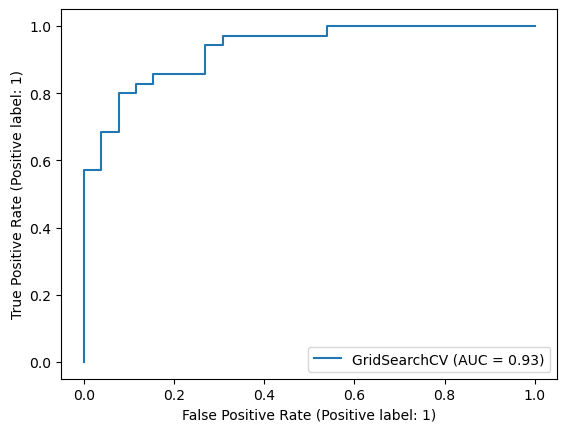

In [53]:
# Plotting the Area Under the Curve (AUC)
y_pred = LR_GS.predict(x_test)
plot_roc_curve(LR_GS,x_test,y_test);

In [54]:
# COnfusion matrix
print(confusion_matrix(y_test,y_pred))

[[19  7]
 [ 4 31]]


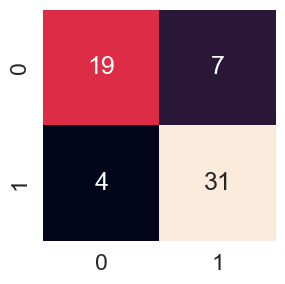

In [58]:
sns.set(font_scale=1.5)

def plot_confussion_matrx(y_test,y_pred):
    "This is plot the Confussion matrix"
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                         annot = True,
                         cbar = False)
plot_confussion_matrx(y_test,y_pred)
# model confuse hn FN py .. hamara model 4/7 py confuse hn model ny 7 time ghlt predict kiya (should have predicted 1 but predictied 0 and also 4 time wrongprediction model should predict 1 but model ny 0 pedict kia ) that's why model has confused ..

## Let's plot the Classification Report 

In [60]:
# Class Imbalance = exp ( Atai mn namak ko dhonda hn atha zyda hota hn namak kam  ) / (1000 samples hn patients k usmy 10 ko heart diease hn hamay usko dhonda hn ye Class Imbalance probelm hn)
# Recall = Recall or Precision are inversly of each other ==  exp ( max / maximum number of salt usny uthai tu ye recall hn)  / ( wo casses ju hum ko predict krna chahyai is liya hum recall use krty hn k koye data miss na hu )
# Precison = exp (high/ low / low is liya hn precision k recall mn hum ny max salt ko jab niakla tha tu usmy probabilty ye bhe hn ke hum ny athai ko bhe uthya hoga is lia precision LOW hn)
# f1 score = (hamara kam hn f1 ko manage krna aur usko maximize krna )

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.82      0.89      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



## Cross validation

In [62]:
# ye hum is score ko maximize krny ke liya use krty k q ke cross validation mn hum apny dataset k multiples set's utha skty hn 


In [65]:
# first we have create an instance of GSCV then we have apply it on Cross validation easily
LR_GS.best_params_
LR = LogisticRegression(C= 1.623776739188721,
                       solver = 'liblinear')

In [67]:
# Cross validation Accuracy 
cv_accuracy = cross_val_score(LR,
                             x,
                             y,
                             cv=7,
                             scoring = 'accuracy')

# show mean accuray of all samples 
cv_accuracy =  np.mean(cv_accuracy)
cv_accuracy # we have improved accurcy score :)

0.8610691633947447

In [68]:
# Cross validation Precision 
cv_precision = cross_val_score(LR,
                             x,
                             y,
                             cv=7,
                             scoring = 'precision')

# show mean accuray of all samples 
cv_precision =  np.mean(cv_precision)
cv_precision

0.8560204081632653

In [70]:
# Cross validation Recall 
cv_recall = cross_val_score(LR,
                             x,
                             y,
                             cv=7,
                             scoring = 'recall')

# show mean accuray of all samples 
cv_recall =  np.mean(cv_recall)
cv_recall # precision ka score reacll se kam hona chyai is case mn and this is correct ..

0.8881987577639752

In [71]:
# Cross validation F1
cv_f1 = cross_val_score(LR,
                             x,
                             y,
                             cv=7,
                             scoring = 'f1')

# show mean accuray of all samples 
cv_f1 =  np.mean(cv_f1)
cv_f1

0.87118909459335

## Visualizing the Cross Validation Matrices 

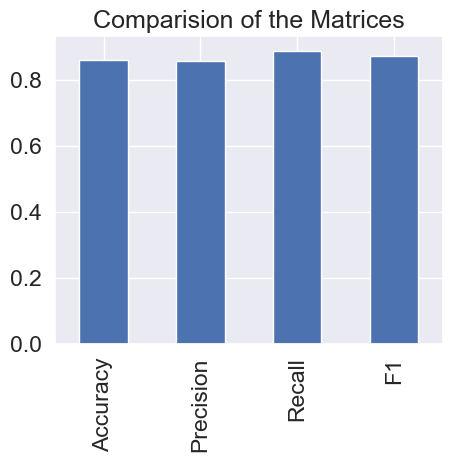

In [83]:
cv_plot = pd.DataFrame({
   'Accuracy': cv_accuracy,
    'Precision' :cv_precision,
    'Recall' : cv_recall,
    'F1' : cv_f1
    },index=[0])

cv_plot.T.plot.bar(figsize=(5,4),
                   title='Comparision of the Matrices',
                 legend = False );


## Features Improving

In [85]:
# hamary saray features ju hn mtlb columns esko compare krty hn target var se ke konsa feature imp hn hmary target k liya or konsa nhi hn let's try this 

In [86]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
298,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
299,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
300,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


In [89]:
# check coffiecient first we fit the model 
LR.fit(x_train,y_train)
LR.coef_

array([[ 0.01654479, -0.8398266 ,  1.50095786, -0.02061175,  0.00154046,
        -0.33038418,  1.01030006,  0.02331645, -0.38652096, -1.18151933,
         1.06571683, -1.25689208, -1.35051191]])

In [91]:
# let's try to show clearly
final_coef = dict(zip(df.columns,list(LR.coef_[0])))
final_coef

{'age': 0.01654479267356862,
 'sex': -0.8398265996561731,
 'cp': 1.5009578604345666,
 'trestbps': -0.020611749269272308,
 'chol': 0.001540464000299818,
 'fbs': -0.3303841849198807,
 'restecg': 1.0103000603689691,
 'thalach': 0.023316449550681212,
 'exang': -0.3865209561838661,
 'oldpeak': -1.1815193319880626,
 'slope': 1.065716828498296,
 'ca': -1.2568920798744256,
 'thal': -1.350511912604638}

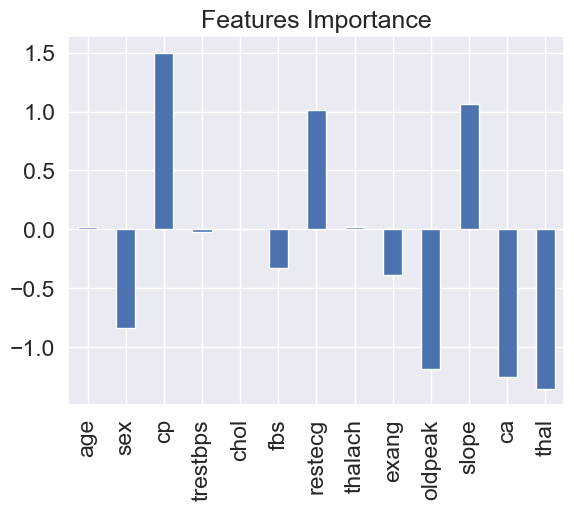

In [93]:
# ok sure now try to plot, it will be shown clearly which feacture are imp or not 
features = pd.DataFrame(final_coef,
                       index = [0])
features.T.plot.bar(title='Features Importance',
                   legend = False);
# Coffiecient compare feature to target or correlation compare features to featuress
# positively correlated or negative coreelated (PC are well align to each other and NC are for example in grph .(sex are strongly negative corelated means that female zyda hoga tu male kam hoga ya male zyda hoga tu female kam hoga ))


# Conclusion

* We set 95% accuracy goal, but we did not meet
  * We can ask some Questions
    * What if we try to get more Data
    * What if we try to improve the quality of the Data
    * What if we try to use other models and see if there is any improvments